# 📈 AAPL Stock Forecasting
This notebook compares four models to forecast Apple stock price:
- ARIMA
- Prophet
- XGBoost
- Random Forest

In [9]:
import sys
import os
sys.path.append(os.path.abspath("../src"))

In [10]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
from features import load_data, add_technical_indicators, add_lag_features
from model import train_arima, train_prophet, train_tree_model


In [11]:
# Load Apple data
df = load_data()
df = add_technical_indicators(df)
df = add_lag_features(df)
df.tail()

c:\Users\jchde\OneDrive\Desktop\HyperionDev\Data-Science-Portfolio\1-equity-price-forecasting\src\features.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,SMA_20,EMA_20,RSI,MACD,lag_1,lag_2,lag_3
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,
Date,,,,,,,,,,,,
2025-06-13,196.449997,200.369995,195.699997,199.729996,51447300,201.897000,201.585117,40.802560,-0.340416,199.199997,198.779999,202.669998
2025-06-16,198.419998,198.690002,196.559998,197.300003,43020700,201.255000,201.283677,44.244670,-0.320757,196.449997,199.199997,198.779999
2025-06-17,195.639999,198.389999,195.210007,197.199997,38856200,200.598000,200.746184,40.652387,-0.457075,198.419998,196.449997,199.199997
2025-06-18,196.580002,197.570007,195.070007,195.940002,45394700,200.084000,200.349405,42.356616,-0.445566,195.639999,198.419998,196.449997
2025-06-20,201.000000,201.699997,196.860001,198.240005,95914700,200.029501,200.411366,49.674578,-0.118905,196.580002,195.639999,198.419998


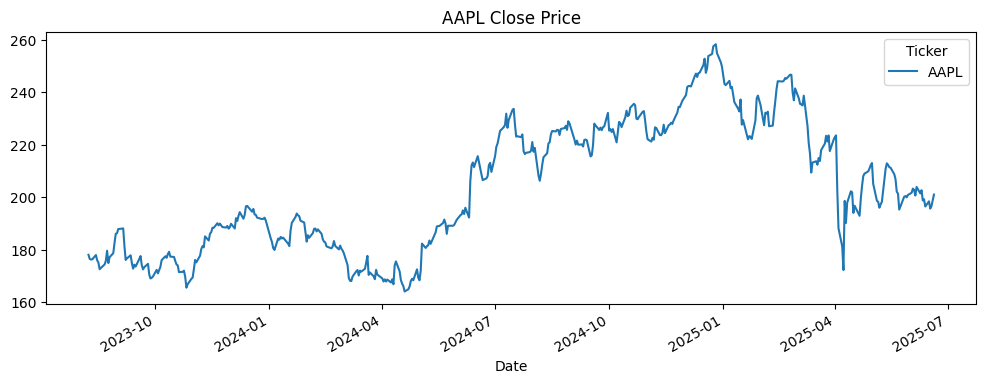

In [12]:
# Visualize closing prices
df['Close'].plot(title='AAPL Close Price', figsize=(12, 4));

c:\Users\jchde\OneDrive\Desktop\HyperionDev\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jchde\OneDrive\Desktop\HyperionDev\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jchde\OneDrive\Desktop\HyperionDev\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


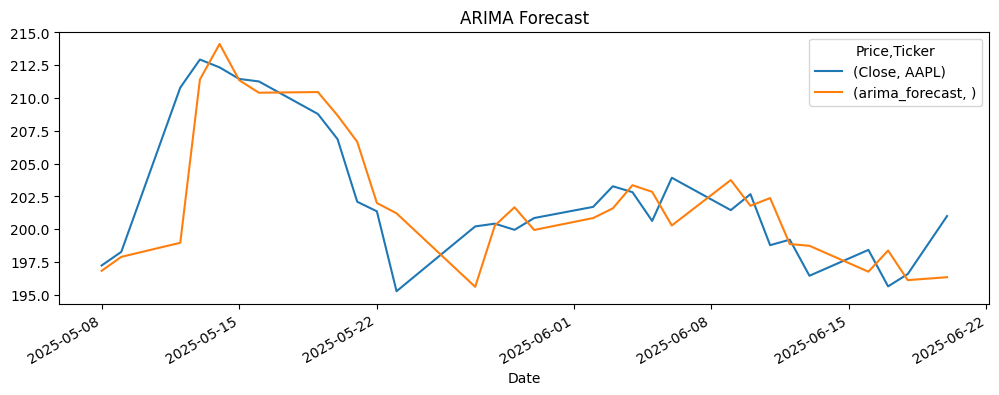

In [13]:
# ARIMA model
arima_result = train_arima(df)
df['arima_forecast'] = arima_result.predict(start=len(df)-30, end=len(df)-1)
df[['Close', 'arima_forecast']].tail(30).plot(title='ARIMA Forecast', figsize=(12, 4));

In [8]:
# Prophet model
prophet_model = train_prophet(df)
future = prophet_model.make_future_dataframe(periods=30)
forecast = prophet_model.predict(future)
prophet_model.plot(forecast);

TypeError: arg must be a list, tuple, 1-d array, or Series

In [ ]:
# Random Forest and XGBoost comparison
rf_model = train_tree_model(df.copy(), model_type='rf')
xgb_model = train_tree_model(df.copy(), model_type='xgb')
features = [col for col in df.columns if col not in ['Close']]
df['rf_pred'] = rf_model.predict(df[features])
df['xgb_pred'] = xgb_model.predict(df[features])
df[['Close', 'rf_pred', 'xgb_pred']].tail(60).plot(title='Tree Models Forecast', figsize=(12, 4));